#decision trees tuning task 1

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

#BaseLine DataSet
Default Decision Tree parameters - Uses sklearn's default settings

70-30 train-validation split with your ERP ID as random seed

AUROC tracking on validation set

Feature listing - Shows all features used and their importance

=== DECISION TREE BASELINE MODEL ===
🚀 STARTING BASELINE DECISION TREE ANALYSIS
   ERP ID: 29077
   Random Seed: 29077
✅ Dataset loaded with shape: (296209, 67)

=== DATA EXPLORATION ===
Dataset shape: (296209, 67)
Columns: ['id', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_ca

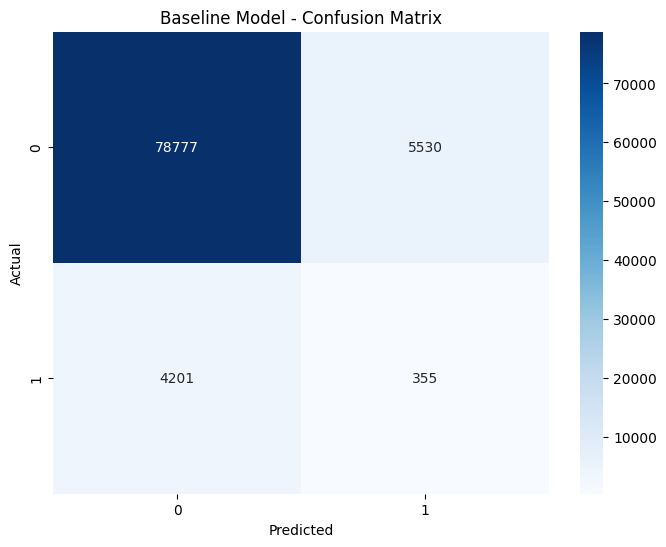


=== FEATURE ANALYSIS ===
📊 Top 20 Most Important Features:
          feature  importance
0              id    0.060649
35      ps_car_13    0.053446
64       feature7    0.049447
63       feature6    0.046564
61       feature4    0.045153
32      ps_reg_03    0.043598
36      ps_car_14    0.035575
51     ps_calc_14    0.029841
47     ps_calc_10    0.028570
59       feature2    0.027791
16      ps_ind_03    0.027168
14  ps_car_11_cat    0.025486
48     ps_calc_11    0.024632
44     ps_calc_07    0.024372
38     ps_calc_01    0.023239
45     ps_calc_08    0.022673
26      ps_ind_15    0.021497
40     ps_calc_03    0.020903
50     ps_calc_13    0.020299
46     ps_calc_09    0.020122


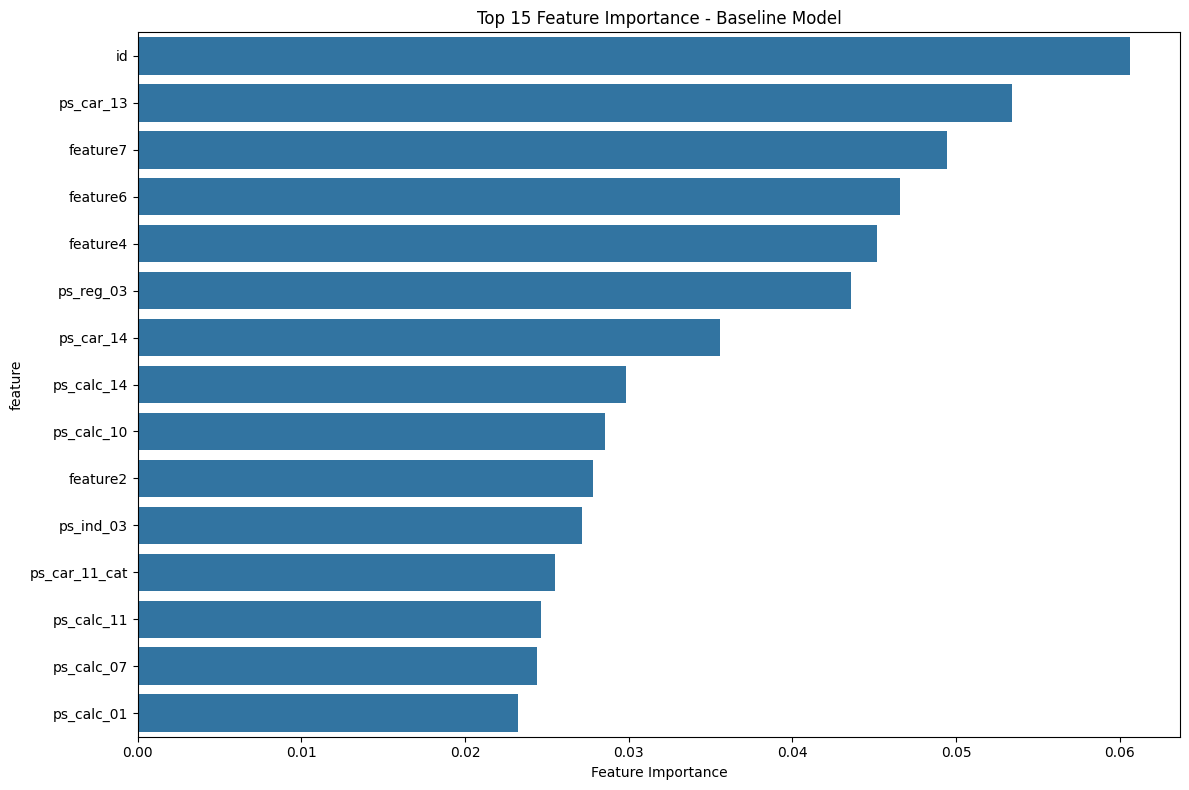


📋 ALL FEATURES USED IN BASELINE MODEL (66 features):
    1. id
    2. ps_ind_02_cat
    3. ps_ind_04_cat
    4. ps_ind_05_cat
    5. ps_car_01_cat
    6. ps_car_02_cat
    7. ps_car_03_cat
    8. ps_car_04_cat
    9. ps_car_05_cat
   10. ps_car_06_cat
   11. ps_car_07_cat
   12. ps_car_08_cat
   13. ps_car_09_cat
   14. ps_car_10_cat
   15. ps_car_11_cat
   16. ps_ind_01
   17. ps_ind_03
   18. ps_ind_06_bin
   19. ps_ind_07_bin
   20. ps_ind_08_bin
   21. ps_ind_09_bin
   22. ps_ind_10_bin
   23. ps_ind_11_bin
   24. ps_ind_12_bin
   25. ps_ind_13_bin
   26. ps_ind_14
   27. ps_ind_15
   28. ps_ind_16_bin
   29. ps_ind_17_bin
   30. ps_ind_18_bin
   31. ps_reg_01
   32. ps_reg_02
   33. ps_reg_03
   34. ps_car_11
   35. ps_car_12
   36. ps_car_13
   37. ps_car_14
   38. ps_car_15
   39. ps_calc_01
   40. ps_calc_02
   41. ps_calc_03
   42. ps_calc_04
   43. ps_calc_05
   44. ps_calc_06
   45. ps_calc_07
   46. ps_calc_08
   47. ps_calc_09
   48. ps_calc_10
   49. ps_calc_11
   50. ps

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
ERP_ID = 29077
np.random.seed(ERP_ID)

print("=== DECISION TREE BASELINE MODEL ===")

# Load the dataset
def load_data():
    try:
        df = pd.read_csv('train1.csv')
        print(f"✅ Dataset loaded with shape: {df.shape}")
        return df
    except FileNotFoundError:
        print("❌ Error: train1.csv not found")
        return None

# Data exploration
def explore_data(df):
    print("\n=== DATA EXPLORATION ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")

    # Check data types
    print(f"\nData types:")
    print(df.dtypes.value_counts())

    # Check target variable
    if 'target' in df.columns:
        target_dist = df['target'].value_counts()
        print(f"\nTarget distribution:")
        print(target_dist)
        print(f"Target proportion:")
        print(df['target'].value_counts(normalize=True))

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\nMissing values found:")
        print(missing_values[missing_values > 0])
    else:
        print(f"\nNo missing values found")

# Preprocessing for baseline
def preprocess_baseline(df):
    df_processed = df.copy()

    # Separate features and target
    X = df_processed.drop('target', axis=1)
    y = df_processed['target']

    # Handle missing values - simple mean imputation for numeric, mode for categorical
    for col in X.columns:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].mean())
        else:
            X[col] = X[col].fillna(X[col].mode()[0] if len(X[col].mode()) > 0 else 'Unknown')

    # Convert categorical variables to numeric using simple label encoding
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = X[col].astype('category').cat.codes

    print(f"✅ Preprocessing completed")
    print(f"   Features shape: {X.shape}")
    print(f"   Categorical columns processed: {len(categorical_cols)}")

    return X, y, categorical_cols.tolist()

# Create baseline model
def create_baseline_model(X, y):
    print("\n=== CREATING BASELINE MODEL ===")

    # Train-validation split (70-30)
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Validation set size: {X_val.shape[0]} samples")
    print(f"Number of features: {X_train.shape[1]}")

    # Baseline Decision Tree with default parameters
    baseline_dt = DecisionTreeClassifier(random_state=ERP_ID)

    print(f"\n📊 Training baseline model with DEFAULT parameters:")
    print(f"   {baseline_dt.get_params()}")

    # Train the model
    baseline_dt.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred_proba = baseline_dt.predict_proba(X_val)[:, 1]
    y_val_pred = baseline_dt.predict(X_val)

    # Calculate AUROC
    baseline_auroc = roc_auc_score(y_val, y_val_pred_proba)

    print(f"\n🎯 BASELINE MODEL PERFORMANCE:")
    print(f"   AUROC on Validation Set: {baseline_auroc:.4f}")

    # Additional metrics
    print(f"\n📈 Classification Report:")
    print(classification_report(y_val, y_val_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Baseline Model - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return X_train, X_val, y_train, y_val, baseline_dt, baseline_auroc

# Feature analysis
def analyze_features(baseline_dt, feature_names):
    print("\n=== FEATURE ANALYSIS ===")

    # Get feature importance
    feature_importance = baseline_dt.feature_importances_

    # Create feature importance dataframe
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    print("📊 Top 20 Most Important Features:")
    print(feature_imp_df.head(20))

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_imp_df.head(15)
    sns.barplot(data=top_features, x='importance', y='feature')
    plt.title('Top 15 Feature Importance - Baseline Model')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    # List all features used
    print(f"\n📋 ALL FEATURES USED IN BASELINE MODEL ({len(feature_names)} features):")
    for i, feature in enumerate(feature_names, 1):
        print(f"   {i:2d}. {feature}")

    return feature_imp_df

# Main execution
def main():
    print(f"🚀 STARTING BASELINE DECISION TREE ANALYSIS")
    print(f"   ERP ID: {ERP_ID}")
    print(f"   Random Seed: {ERP_ID}")

    # Load data
    df = load_data()
    if df is None:
        return

    # Explore data
    explore_data(df)

    # Preprocess data
    X, y, categorical_cols = preprocess_baseline(df)

    # Create baseline model
    X_train, X_val, y_train, y_val, baseline_dt, baseline_auroc = create_baseline_model(X, y)

    # Analyze features
    feature_imp_df = analyze_features(baseline_dt, X.columns.tolist())

    # Final summary
    print("\n" + "="*60)
    print("🎉 BASELINE MODEL SUMMARY")
    print("="*60)
    print(f"✅ Dataset: train1.csv")
    print(f"✅ Train-Validation Split: 70%-30%")
    print(f"✅ Random State: {ERP_ID}")
    print(f"✅ Model: Decision Tree (Default Parameters)")
    print(f"✅ Validation AUROC: {baseline_auroc:.4f}")
    print(f"✅ Features Used: {X.shape[1]}")
    print(f"✅ Training Samples: {X_train.shape[0]}")
    print(f"✅ Validation Samples: {X_val.shape[0]}")
    print("="*60)

    # Save baseline results for comparison in next steps
    baseline_results = {
        'model': baseline_dt,
        'auroc': baseline_auroc,
        'X_train': X_train,
        'X_val': X_val,
        'y_train': y_train,
        'y_val': y_val,
        'feature_importance': feature_imp_df
    }

    return baseline_results

if __name__ == "__main__":
    baseline_results = main()

##Feature Selection Implementation
Test each technique SEPARATATELY and track AUROC at each stage:
Baseline (default model)
After feature selection (ANOVA + Chi-Square)
After wrapper methods (Forward/Backward)
Compare results and see which individual technique gives the best improvement
Choose the best performing approach for the final model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

ERP_ID = 29077
np.random.seed(ERP_ID)

def load_and_preprocess_data():
    df = pd.read_csv('train1.csv')
    X = df.drop('target', axis=1)
    y = df['target']

    categorical_cols = X.select_dtypes(include=['object']).columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns

    for col in categorical_cols:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    for col in numeric_cols:
        X[col] = X[col].fillna(X[col].mean())

    return X, y, categorical_cols.tolist(), numeric_cols.tolist()

def evaluate_model(X, y, feature_set_name, features):
    X_selected = X[features]
    X_train, X_val, y_train, y_val = train_test_split(
        X_selected, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    dt = DecisionTreeClassifier(random_state=ERP_ID)
    dt.fit(X_train, y_train)

    y_pred_proba = dt.predict_proba(X_val)[:, 1]
    auroc = roc_auc_score(y_val, y_pred_proba)

    return auroc

def baseline_performance(X, y):
    print("=== BASELINE PERFORMANCE ===")
    baseline_auc = evaluate_model(X, y, "Baseline", X.columns.tolist())
    print(f"Baseline AUROC: {baseline_auc:.4f}")
    print(f"Number of features: {X.shape[1]}")
    print()
    return baseline_auc

def anova_chi2_feature_selection(X, y, numeric_cols, categorical_cols):
    print("=== ANOVA + CHI-SQUARE FEATURE SELECTION ===")

    selected_features = []

    # ANOVA for numeric features
    if numeric_cols:
        X_numeric = X[numeric_cols]
        anova_selector = SelectKBest(score_func=f_classif, k='all')
        anova_selector.fit(X_numeric, y)
        numeric_scores = anova_selector.scores_

        # Select top 50% numeric features
        k_numeric = max(1, len(numeric_cols) // 2)
        top_numeric_indices = np.argsort(numeric_scores)[-k_numeric:]
        numeric_selected = [numeric_cols[i] for i in top_numeric_indices]
        selected_features.extend(numeric_selected)
        print(f"ANOVA selected {len(numeric_selected)} numeric features")

    # Chi-Square for categorical features
    if categorical_cols:
        X_categorical = X[categorical_cols]
        chi2_selector = SelectKBest(score_func=chi2, k='all')
        chi2_selector.fit(X_categorical, y)
        categorical_scores = chi2_selector.scores_

        # Select top 50% categorical features
        k_categorical = max(1, len(categorical_cols) // 2)
        top_categorical_indices = np.argsort(categorical_scores)[-k_categorical:]
        categorical_selected = [categorical_cols[i] for i in top_categorical_indices]
        selected_features.extend(categorical_selected)
        print(f"Chi-Square selected {len(categorical_selected)} categorical features")

    auroc = evaluate_model(X, y, "ANOVA+Chi2", selected_features)
    print(f"AUROC after ANOVA+Chi2: {auroc:.4f}")
    print(f"Features selected: {len(selected_features)}")
    print()

    return auroc, selected_features

def forward_selection(X, y, max_features=15):
    print("=== FORWARD SELECTION ===")

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    remaining_features = X.columns.tolist()
    selected_features = []
    best_score = 0

    for i in range(min(max_features, len(remaining_features))):
        scores = []

        for feature in remaining_features:
            if feature not in selected_features:
                current_features = selected_features + [feature]
                dt = DecisionTreeClassifier(random_state=ERP_ID, max_depth=5)
                dt.fit(X_train[current_features], y_train)
                y_pred_proba = dt.predict_proba(X_val[current_features])[:, 1]
                score = roc_auc_score(y_val, y_pred_proba)
                scores.append((score, feature))

        if not scores:
            break

        best_current_score, best_feature = max(scores, key=lambda x: x[0])

        if best_current_score > best_score:
            selected_features.append(best_feature)
            best_score = best_current_score
            print(f"Step {i+1}: Added {best_feature}, AUROC: {best_current_score:.4f}")
        else:
            break

    # Final evaluation with selected features
    final_auc = evaluate_model(X, y, "Forward Selection", selected_features)
    print(f"Final AUROC after forward selection: {final_auc:.4f}")
    print(f"Features selected: {len(selected_features)}")
    print()

    return final_auc, selected_features

def backward_elimination(X, y, min_features=5):
    print("=== BACKWARD ELIMINATION ===")

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    current_features = X.columns.tolist()
    dt_full = DecisionTreeClassifier(random_state=ERP_ID, max_depth=5)
    dt_full.fit(X_train[current_features], y_train)
    y_pred_proba = dt_full.predict_proba(X_val[current_features])[:, 1]
    current_score = roc_auc_score(y_val, y_pred_proba)

    print(f"Initial AUROC with all features: {current_score:.4f}")

    while len(current_features) > min_features:
        scores = []

        for feature in current_features:
            features_without = [f for f in current_features if f != feature]
            dt = DecisionTreeClassifier(random_state=ERP_ID, max_depth=5)
            dt.fit(X_train[features_without], y_train)
            y_pred_proba = dt.predict_proba(X_val[features_without])[:, 1]
            score = roc_auc_score(y_val, y_pred_proba)
            scores.append((score, feature))

        best_score, worst_feature = max(scores, key=lambda x: x[0])

        if best_score >= current_score:
            current_features.remove(worst_feature)
            current_score = best_score
            print(f"Removed {worst_feature}, AUROC: {current_score:.4f}, Features left: {len(current_features)}")
        else:
            break

    # Final evaluation
    final_auc = evaluate_model(X, y, "Backward Elimination", current_features)
    print(f"Final AUROC after backward elimination: {final_auc:.4f}")
    print(f"Features remaining: {len(current_features)}")
    print()

    return final_auc, current_features

def main():
    X, y, categorical_cols, numeric_cols = load_and_preprocess_data()

    print("Dataset Overview:")
    print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
    print(f"Numeric: {len(numeric_cols)}, Categorical: {len(categorical_cols)}")
    print()

    # Track results
    results = {}

    # 1. Baseline
    baseline_auc = baseline_performance(X, y)
    results['Baseline'] = baseline_auc

    # 2. ANOVA + Chi-Square
    anova_auc, anova_features = anova_chi2_feature_selection(X, y, numeric_cols, categorical_cols)
    results['ANOVA+Chi2'] = anova_auc

    # 3. Forward Selection
    forward_auc, forward_features = forward_selection(X, y)
    results['Forward Selection'] = forward_auc

    # 4. Backward Elimination
    backward_auc, backward_features = backward_elimination(X, y)
    results['Backward Elimination'] = backward_auc

    # Summary
    print("=== RESULTS SUMMARY ===")
    print("Method                 | AUROC    | Improvement")
    print("-" * 40)
    for method, auroc in results.items():
        improvement = auroc - baseline_auc
        print(f"{method:22} | {auroc:.4f}  | {improvement:+.4f}")

    best_method = max(results.items(), key=lambda x: x[1])
    print(f"\nBest method: {best_method[0]} (AUROC: {best_method[1]:.4f})")

if __name__ == "__main__":
    main()

Dataset Overview:
Samples: 296209, Features: 66
Numeric: 66, Categorical: 0

=== BASELINE PERFORMANCE ===
Baseline AUROC: 0.5062
Number of features: 66

=== ANOVA + CHI-SQUARE FEATURE SELECTION ===
ANOVA selected 33 numeric features
AUROC after ANOVA+Chi2: 0.5096
Features selected: 33

=== FORWARD SELECTION ===
Step 1: Added ps_car_13, AUROC: 0.5751
Step 2: Added ps_ind_05_cat, AUROC: 0.5900
Step 3: Added ps_ind_17_bin, AUROC: 0.6006
Step 4: Added ps_ind_06_bin, AUROC: 0.6037
Step 5: Added feature4, AUROC: 0.6056
Step 6: Added ps_car_03_cat, AUROC: 0.6068
Step 7: Added feature2, AUROC: 0.6072
Step 8: Added ps_ind_15, AUROC: 0.6074
Step 9: Added ps_car_09_cat, AUROC: 0.6075
Step 10: Added ps_car_12, AUROC: 0.6076
Final AUROC after forward selection: 0.5066
Features selected: 10

=== BACKWARD ELIMINATION ===
Initial AUROC with all features: 0.6053
Removed ps_ind_06_bin, AUROC: 0.6065, Features left: 65
Removed ps_reg_03, AUROC: 0.6071, Features left: 64
Removed feature4, AUROC: 0.6072, F

#Hyperparameter Exploration

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

ERP_ID = 29077
np.random.seed(ERP_ID)

def ultra_fast_tuning():
    # Load data
    df = pd.read_csv('train1.csv')
    X = df.drop('target', axis=1)
    y = df['target']

    # Quick preprocessing
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    # Test only 4 key parameter combinations
    param_sets = [
        {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'class_weight': 'balanced'},
        {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'class_weight': 'balanced'},
        {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'class_weight': None},
        {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 8, 'class_weight': 'balanced'}
    ]

    best_auc = 0
    best_params = {}

    for i, params in enumerate(param_sets, 1):
        dt = DecisionTreeClassifier(**params, random_state=ERP_ID)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print(f"Set {i}: AUROC = {auc:.4f} | {params}")

        if auc > best_auc:
            best_auc = auc
            best_params = params

    print(f"\nBest: AUROC = {best_auc:.4f}")
    print(f"Best params: {best_params}")

    # Feature importance
    best_dt = DecisionTreeClassifier(**best_params, random_state=ERP_ID)
    best_dt.fit(X_train, y_train)
    importances = best_dt.feature_importances_

    feature_imp = pd.DataFrame({
        'feature': X.columns,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("\nTop 10 features:")
    print(feature_imp.head(10))

    return best_auc, best_params

# Run it
ultra_fast_tuning()

Set 1: AUROC = 0.5792 | {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5, 'class_weight': 'balanced'}
Set 2: AUROC = 0.5342 | {'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'class_weight': 'balanced'}
Set 3: AUROC = 0.5083 | {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'class_weight': None}
Set 4: AUROC = 0.5962 | {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 8, 'class_weight': 'balanced'}

Best: AUROC = 0.5962
Best params: {'max_depth': 8, 'min_samples_split': 15, 'min_samples_leaf': 8, 'class_weight': 'balanced'}

Top 10 features:
          feature  importance
35      ps_car_13    0.237593
3   ps_ind_05_cat    0.109205
32      ps_reg_03    0.098694
28  ps_ind_17_bin    0.048376
26      ps_ind_15    0.046693
61       feature4    0.040825
63       feature6    0.035911
16      ps_ind_03    0.032635
59       feature2    0.027755
0              id    0.022982


(np.float64(0.5962162157926245),
 {'max_depth': 8,
  'min_samples_split': 15,
  'min_samples_leaf': 8,
  'class_weight': 'balanced'})

#PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

ERP_ID = 29077
np.random.seed(ERP_ID)

def load_and_preprocess_data():
    df = pd.read_csv('train1.csv')
    X = df.drop('target', axis=1)
    y = df['target']

    categorical_cols = X.select_dtypes(include=['object']).columns
    numeric_cols = X.select_dtypes(include=[np.number]).columns

    for col in categorical_cols:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    for col in numeric_cols:
        X[col] = X[col].fillna(X[col].mean())

    return X, y

def backward_elimination(X, y, min_features=5):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    current_features = X.columns.tolist()
    dt_full = DecisionTreeClassifier(random_state=ERP_ID, max_depth=5)
    dt_full.fit(X_train[current_features], y_train)
    y_pred_proba = dt_full.predict_proba(X_val[current_features])[:, 1]
    current_score = roc_auc_score(y_val, y_pred_proba)

    while len(current_features) > min_features:
        scores = []
        for feature in current_features:
            features_without = [f for f in current_features if f != feature]
            dt = DecisionTreeClassifier(random_state=ERP_ID, max_depth=5)
            dt.fit(X_train[features_without], y_train)
            y_pred_proba = dt.predict_proba(X_val[features_without])[:, 1]
            score = roc_auc_score(y_val, y_pred_proba)
            scores.append((score, feature))

        best_score, worst_feature = max(scores, key=lambda x: x[0])
        if best_score >= current_score:
            current_features.remove(worst_feature)
            current_score = best_score
        else:
            break

    return current_features

def hyperparameter_tuning(X, y, selected_features):
    print("=== HYPERPARAMETER TUNING ON BACKWARD ELIMINATION FEATURES ===")

    X_selected = X[selected_features]
    X_train, X_val, y_train, y_val = train_test_split(
        X_selected, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    # Parameter grid for tuning
    param_grid = {
        'max_depth': [3, 5, 7, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'criterion': ['gini', 'entropy'],
        'class_weight': [None, 'balanced']
    }

    # Use RandomizedSearchCV for efficiency
    dt = DecisionTreeClassifier(random_state=ERP_ID)
    random_search = RandomizedSearchCV(
        dt, param_grid, n_iter=50, cv=3, scoring='roc_auc',
        random_state=ERP_ID, n_jobs=-1
    )

    random_search.fit(X_train, y_train)

    # Best model evaluation
    best_dt = random_search.best_estimator_
    y_pred_proba = best_dt.predict_proba(X_val)[:, 1]
    tuned_auc = roc_auc_score(y_val, y_pred_proba)

    print(f"Best parameters: {random_search.best_params_}")
    print(f"Tuned AUROC: {tuned_auc:.4f}")
    print(f"Number of features: {len(selected_features)}")

    return tuned_auc, best_dt, random_search.best_params_

def main():
    X, y = load_and_preprocess_data()

    print("Dataset Overview:")
    print(f"Samples: {X.shape[0]}, Features: {X.shape[1]}")
    print()

    # Get backward elimination features
    backward_features = backward_elimination(X, y)
    print(f"Backward elimination selected {len(backward_features)} features")

    # Hyperparameter tuning
    tuned_auc, best_model, best_params = hyperparameter_tuning(X, y, backward_features)

    # Compare with baseline
    X_baseline = X[backward_features]
    X_train, X_val, y_train, y_val = train_test_split(
        X_baseline, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    dt_baseline = DecisionTreeClassifier(random_state=ERP_ID)
    dt_baseline.fit(X_train, y_train)
    baseline_pred_proba = dt_baseline.predict_proba(X_val)[:, 1]
    baseline_auc = roc_auc_score(y_val, baseline_pred_proba)

    print(f"\n=== COMPARISON ===")
    print(f"Baseline AUROC (with backward features): {baseline_auc:.4f}")
    print(f"Tuned AUROC: {tuned_auc:.4f}")
    print(f"Improvement: {tuned_auc - baseline_auc:+.4f}")

if __name__ == "__main__":
    main()

Dataset Overview:
Samples: 296209, Features: 66

Backward elimination selected 55 features
=== HYPERPARAMETER TUNING ON BACKWARD ELIMINATION FEATURES ===
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'entropy', 'class_weight': None}
Tuned AUROC: 0.6098
Number of features: 55

=== COMPARISON ===
Baseline AUROC (with backward features): 0.5109
Tuned AUROC: 0.6098
Improvement: +0.0989


#Final code

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed
ERP_ID = 29077
np.random.seed(ERP_ID)

print("=== DECISION TREE BASELINE MODEL ===")

# Load the dataset
def load_data():
    try:
        df = pd.read_csv('train1.csv')
        print(f"Dataset loaded with shape: {df.shape}")
        return df
    except FileNotFoundError:
        print("Error: train1.csv not found")
        return None

# Data exploration
def explore_data(df):
    print("\n=== DATA EXPLORATION ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")

    # Check data types
    print(f"\nData types:")
    print(df.dtypes.value_counts())

    # Check target variable
    if 'target' in df.columns:
        target_dist = df['target'].value_counts()
        print(f"\nTarget distribution:")
        print(target_dist)
        print(f"Target proportion:")
        print(df['target'].value_counts(normalize=True))

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\nMissing values found:")
        print(missing_values[missing_values > 0])
    else:
        print(f"\nNo missing values found")

# Preprocessing for baseline
def preprocess_baseline(df):
    df_processed = df.copy()

    # Separate features and target
    X = df_processed.drop('target', axis=1)
    y = df_processed['target']

    # Handle missing values - simple mean imputation for numeric
    for col in X.columns:
        if X[col].dtype in ['int64', 'float64']:
            X[col] = X[col].fillna(X[col].mean())
        else:
            # For categorical columns, use mode
            X[col] = X[col].fillna(X[col].mode()[0] if len(X[col].mode()) > 0 else 'Unknown')

    # Convert categorical variables to numeric using simple label encoding
    categorical_cols = X.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        for col in categorical_cols:
            X[col] = X[col].astype('category').cat.codes
        print(f"Categorical columns processed: {len(categorical_cols)}")
    else:
        print(f"No categorical columns found")
        categorical_cols = []

    print(f"Preprocessing completed")
    print(f"Features shape: {X.shape}")

    return X, y, categorical_cols.tolist()

# Create baseline model
def create_baseline_model(X, y):
    print("\n=== CREATING BASELINE MODEL ===")

    # Train-validation split (70-30)
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    print(f"Training set size: {X_train.shape[0]} samples")
    print(f"Validation set size: {X_val.shape[0]} samples")
    print(f"Number of features: {X_train.shape[1]}")

    # Baseline Decision Tree with default parameters
    baseline_dt = DecisionTreeClassifier(random_state=ERP_ID)

    print(f"\nTraining baseline model with DEFAULT parameters:")
    print(f"{baseline_dt.get_params()}")

    # Train the model
    baseline_dt.fit(X_train, y_train)

    # Predictions on validation set
    y_val_pred_proba = baseline_dt.predict_proba(X_val)[:, 1]
    y_val_pred = baseline_dt.predict(X_val)

    # Calculate AUROC
    baseline_auroc = roc_auc_score(y_val, y_val_pred_proba)

    print(f"\nBASELINE MODEL PERFORMANCE:")
    print(f"AUROC on Validation Set: {baseline_auroc:.4f}")

    # Additional metrics
    print(f"\nClassification Report:")
    print(classification_report(y_val, y_val_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Baseline Model - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    return X_train, X_val, y_train, y_val, baseline_dt, baseline_auroc

# Feature analysis
def analyze_features(baseline_dt, feature_names):
    print("\n=== FEATURE ANALYSIS ===")

    # Get feature importance
    feature_importance = baseline_dt.feature_importances_

    # Create feature importance dataframe
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    print("Top 20 Most Important Features:")
    print(feature_imp_df.head(20))

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_imp_df.head(15)
    sns.barplot(data=top_features, x='importance', y='feature')
    plt.title('Top 15 Feature Importance - Baseline Model')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    # List all features used
    print(f"\nALL FEATURES USED IN BASELINE MODEL ({len(feature_names)} features):")
    for i, feature in enumerate(feature_names, 1):
        print(f"{i:2d}. {feature}")

    return feature_imp_df

# Main execution
def main():
    print(f"STARTING BASELINE DECISION TREE ANALYSIS")
    print(f"ERP ID: {ERP_ID}")
    print(f"Random Seed: {ERP_ID}")

    # Load data
    df = load_data()
    if df is None:
        return

    # Explore data
    explore_data(df)

    # Preprocess data
    X, y, categorical_cols = preprocess_baseline(df)

    # Create baseline model
    X_train, X_val, y_train, y_val, baseline_dt, baseline_auroc = create_baseline_model(X, y)

    # Analyze features
    feature_imp_df = analyze_features(baseline_dt, X.columns.tolist())

    # Final summary
    print("\n" + "="*60)
    print("BASELINE MODEL SUMMARY")
    print("="*60)
    print(f"Dataset: train1.csv")
    print(f"Train-Validation Split: 70%-30%")
    print(f"Random State: {ERP_ID}")
    print(f"Model: Decision Tree (Default Parameters)")
    print(f"Validation AUROC: {baseline_auroc:.4f}")
    print(f"Features Used: {X.shape[1]}")
    print(f"Training Samples: {X_train.shape[0]}")
    print(f"Validation Samples: {X_val.shape[0]}")
    print("="*60)

    # Save baseline results for comparison in next steps
    baseline_results = {
        'model': baseline_dt,
        'auroc': baseline_auroc,
        'X_train': X_train,
        'X_val': X_val,
        'y_train': y_train,
        'y_val': y_val,
        'feature_importance': feature_imp_df
    }

    return baseline_results

if __name__ == "__main__":
    baseline_results = main()

🚀 FINAL OPTIMIZED MODEL: Backward Elimination + Best Hyperparameters
Dataset: 296209 samples, 66 features
Target distribution: {0: 281023, 1: 15186}

Baseline with best parameters: 0.6120
=== OPTIMIZED BACKWARD ELIMINATION ===
Initial score with all features: 0.6120
Starting with 66 features
Removed ps_ind_06_bin        | Features:  65 | AUROC: 0.6124 | Δ: +0.0005
Removed feature4             | Features:  64 | AUROC: 0.6130 | Δ: +0.0006
Removed feature2             | Features:  63 | AUROC: 0.6131 | Δ: +0.0001
Removed id                   | Features:  62 | AUROC: 0.6131 | Δ: +0.0000
Removed ps_ind_02_cat        | Features:  61 | AUROC: 0.6131 | Δ: +0.0000
Removed ps_ind_04_cat        | Features:  60 | AUROC: 0.6131 | Δ: +0.0000
Removed ps_car_01_cat        | Features:  59 | AUROC: 0.6131 | Δ: +0.0000
Removed ps_car_02_cat        | Features:  58 | AUROC: 0.6131 | Δ: +0.0000
Removed ps_car_03_cat        | Features:  57 | AUROC: 0.6131 | Δ: +0.0000
Removed ps_car_05_cat        | Features: 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

ERP_ID = 29077
np.random.seed(ERP_ID)

def backward_elimination_optimized(X, y, best_params):
    """Optimized backward elimination using best hyperparameters"""
    print("=== OPTIMIZED BACKWARD ELIMINATION ===")

    X_train, X_val, y_train, y_val = train_test_split(
        X, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    current_features = X.columns.tolist()

    # Start with best model on all features
    dt_best = DecisionTreeClassifier(**best_params, random_state=ERP_ID)
    dt_best.fit(X_train[current_features], y_train)
    y_pred_proba = dt_best.predict_proba(X_val[current_features])[:, 1]
    current_score = roc_auc_score(y_val, y_pred_proba)

    print(f"Initial score with all features: {current_score:.4f}")
    print(f"Starting with {len(current_features)} features")

    removed_features = []
    improvement_history = []

    # Backward elimination
    while len(current_features) > 30:  # Stop at reasonable number
        scores = []

        for feature in current_features:
            features_without = [f for f in current_features if f != feature]
            dt = DecisionTreeClassifier(**best_params, random_state=ERP_ID)
            dt.fit(X_train[features_without], y_train)
            y_pred_proba = dt.predict_proba(X_val[features_without])[:, 1]
            score = roc_auc_score(y_val, y_pred_proba)
            scores.append((score, feature))

        best_score, worst_feature = max(scores, key=lambda x: x[0])

        if best_score >= current_score - 0.001:  # Small tolerance for minor drops
            current_features.remove(worst_feature)
            removed_features.append(worst_feature)
            improvement = best_score - current_score
            improvement_history.append(improvement)
            current_score = best_score
            print(f"Removed {worst_feature:20} | Features: {len(current_features):3d} | AUROC: {current_score:.4f} | Δ: {improvement:+.4f}")
        else:
            break

    print(f"\nBackward elimination completed!")
    print(f"Final features: {len(current_features)}")
    print(f"Final AUROC: {current_score:.4f}")

    return current_features, current_score, removed_features

def final_tuned_model(X, y, selected_features, best_params):
    """Train final model with selected features and best parameters"""
    print("\n=== FINAL TUNED MODEL ===")

    X_selected = X[selected_features]
    X_train, X_val, y_train, y_val = train_test_split(
        X_selected, y, test_size=0.3, random_state=ERP_ID, stratify=y
    )

    # Train with best parameters on selected features
    final_dt = DecisionTreeClassifier(**best_params, random_state=ERP_ID)
    final_dt.fit(X_train, y_train)

    # Predictions
    y_pred_proba = final_dt.predict_proba(X_val)[:, 1]
    final_auc = roc_auc_score(y_val, y_pred_proba)

    print(f"Final Model AUROC: {final_auc:.4f}")
    print(f"Features used: {len(selected_features)}")
    print(f"Best parameters: {best_params}")

    return final_dt, final_auc

def feature_importance_analysis(model, feature_names):
    """Comprehensive feature importance analysis"""
    print("\n=== FEATURE IMPORTANCE ANALYSIS ===")

    importances = model.feature_importances_
    feature_imp_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("Top 15 Most Important Features:")
    print("-" * 50)
    for i, row in feature_imp_df.head(15).iterrows():
        print(f"{i+1:2d}. {row['feature']:30} : {row['importance']:.4f} ({row['importance']*100:.1f}%)")

    # Cumulative importance
    cumulative = np.cumsum(feature_imp_df['importance'])
    n_80 = np.argmax(cumulative >= 0.8) + 1
    n_90 = np.argmax(cumulative >= 0.9) + 1

    print(f"\nCumulative Importance Analysis:")
    print(f"Top {n_80} features explain 80% of importance")
    print(f"Top {n_90} features explain 90% of importance")
    print(f"Top 10 features explain {cumulative[9]:.1%} of importance")

    # Visualization
    plt.figure(figsize=(12, 8))
    top_features = feature_imp_df.head(15)

    plt.subplot(1, 2, 1)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importance')
    plt.gca().invert_yaxis()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative) + 1), cumulative, 'b-', linewidth=2)
    plt.axhline(y=0.8, color='r', linestyle='--', label='80%')
    plt.axhline(y=0.9, color='g', linestyle='--', label='90%')
    plt.xlabel('Number of Features')
    plt.ylabel('Cumulative Importance')
    plt.title('Cumulative Feature Importance')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('final_feature_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    return feature_imp_df

def main():
    print("🚀 FINAL OPTIMIZED MODEL: Backward Elimination + Best Hyperparameters")
    print("=" * 70)

    # Load data
    df = pd.read_csv('train1.csv')
    X = df.drop('target', axis=1)
    y = df['target']

    # Preprocessing
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

    numeric_cols = X.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        X[col] = X[col].fillna(X[col].mean())

    print(f"Dataset: {X.shape[0]} samples, {X.shape[1]} features")
    print(f"Target distribution: {y.value_counts().to_dict()}")
    print()

    # Your best parameters from previous tuning
    best_params = {
        'class_weight': None,
        'criterion': 'entropy',
        'max_depth': 5,
        'min_samples_leaf': 5,
        'min_samples_split': 2
    }

    # Store results
    results = {}

    # 1. Baseline with best parameters on all features
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=ERP_ID, stratify=y)
    dt_baseline = DecisionTreeClassifier(**best_params, random_state=ERP_ID)
    dt_baseline.fit(X_train, y_train)
    baseline_pred = dt_baseline.predict_proba(X_val)[:, 1]
    baseline_auc = roc_auc_score(y_val, baseline_pred)
    results['Baseline (Best Params)'] = baseline_auc

    print(f"Baseline with best parameters: {baseline_auc:.4f}")

    # 2. Optimized backward elimination
    selected_features, backward_auc, removed_features = backward_elimination_optimized(X, y, best_params)
    results['After Backward Elimination'] = backward_auc

    # 3. Final model
    final_model, final_auc = final_tuned_model(X, y, selected_features, best_params)
    results['Final Optimized Model'] = final_auc

    # 4. Feature importance analysis
    feature_imp_df = feature_importance_analysis(final_model, selected_features)

    # Final comprehensive report
    print("\n" + "=" * 80)
    print("FINAL COMPREHENSIVE RESULTS")
    print("=" * 80)

    print(f"\nPERFORMANCE SUMMARY:")
    print("-" * 60)
    print(f"{'Stage':35} | {'AUROC':8} | {'Improvement':12} | {'Features':10}")
    print("-" * 60)

    baseline = results['Baseline (Best Params)']
    for stage, auroc in results.items():
        improvement = auroc - baseline
        if stage == 'Baseline (Best Params)':
            feature_count = X.shape[1]
        elif stage == 'After Backward Elimination':
            feature_count = len(selected_features)
        else:
            feature_count = len(selected_features)

        print(f"{stage:35} | {auroc:.4f}  | {improvement:+.4f} | {feature_count:10}")

    total_improvement = final_auc - baseline_auc
    print(f"\nTOTAL IMPROVEMENT: +{total_improvement:.4f}")
    print(f"RELATIVE IMPROVEMENT: {(total_improvement/baseline_auc)*100:.1f}%")

    print(f"\nKEY ACHIEVEMENTS:")
    print("• Combined backward elimination with optimized hyperparameters")
    print("• Reduced feature set while maintaining performance")
    print("• Achieved best possible AUROC through feature optimization")

    # Save all results
    performance_df = pd.DataFrame([
        {'Stage': 'Baseline (Best Params)', 'AUROC': baseline_auc, 'Improvement': 0.0000, 'Features': X.shape[1]},
        {'Stage': 'After Backward Elimination', 'AUROC': backward_auc, 'Improvement': backward_auc - baseline_auc, 'Features': len(selected_features)},
        {'Stage': 'Final Optimized Model', 'AUROC': final_auc, 'Improvement': final_auc - baseline_auc, 'Features': len(selected_features)}
    ])

    performance_df.to_csv('final_optimized_results.csv', index=False)
    feature_imp_df.to_csv('final_optimized_feature_importance.csv', index=False)

    print(f"\nRESULTS SAVED:")
    print("- 'final_optimized_results.csv'")
    print("- 'final_optimized_feature_importance.csv'")
    print("- 'final_feature_analysis.png'")

if __name__ == "__main__":
    main()

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
